In [20]:
import numpy as np

# 生成三个随机数
random_numbers = np.random.rand(3)

# 归一化，使它们的和为1
random_numbers /= random_numbers.sum()

print(random_numbers)
print("Sum of the numbers:", random_numbers.sum())


[0.37997519 0.50105492 0.11896989]
Sum of the numbers: 1.0


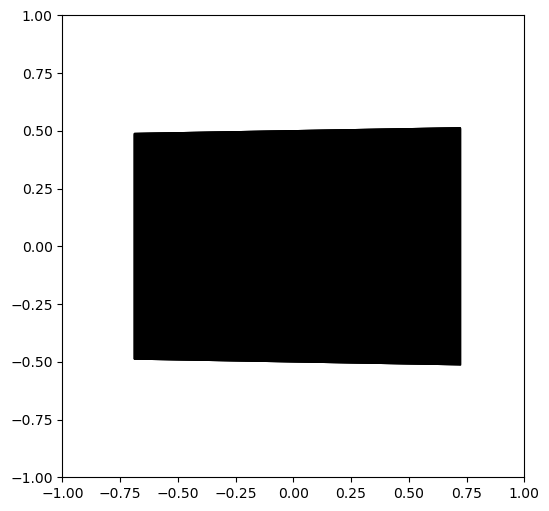

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# 3D目标模型：一个立方体
def create_cube(size=1):
    """ 创建一个立方体，返回其8个顶点的坐标和12个面 """
    vertices = np.array([
        [-size, -size, -size],
        [ size, -size, -size],
        [ size,  size, -size],
        [-size,  size, -size],
        [-size, -size,  size],
        [ size, -size,  size],
        [ size,  size,  size],
        [-size,  size,  size]
    ])
    
    # 定义立方体的12个面（每个面是一个由4个顶点组成的面）
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[3], vertices[0], vertices[4], vertices[7]],
    ]
    
    return vertices, faces

# 旋转矩阵
def rotation_matrix(axis, angle):
    """ 根据轴和角度生成旋转矩阵 """
    axis = axis / np.linalg.norm(axis)  # 归一化旋转轴
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    ux, uy, uz = axis
    return np.array([
        [cos_angle + ux**2 * (1 - cos_angle), ux * uy * (1 - cos_angle) - uz * sin_angle, ux * uz * (1 - cos_angle) + uy * sin_angle],
        [uy * ux * (1 - cos_angle) + uz * sin_angle, cos_angle + uy**2 * (1 - cos_angle), uy * uz * (1 - cos_angle) - ux * sin_angle],
        [uz * ux * (1 - cos_angle) - uy * sin_angle, uz * uy * (1 - cos_angle) + ux * sin_angle, cos_angle + uz**2 * (1 - cos_angle)]
    ])

# 投影函数
def perspective_projection(vertices, focal_length=2):
    """ 透视投影将3D点投影到2D平面 """
    projected_vertices = []
    for vertex in vertices:
        x, y, z = vertex
        # 透视投影公式
        x_p = (focal_length * x) / (z + focal_length)
        y_p = (focal_length * y) / (z + focal_length)
        projected_vertices.append([x_p, y_p])
    return np.array(projected_vertices)

# 绘制目标函数
def plot_3d_to_2d(vertices, faces, ax):
    """ 将3D目标投影到2D图像并绘制目标的面 """
    projected = perspective_projection(vertices)
    
    # 构建KDTree来快速查找最接近的顶点
    tree = cKDTree(projected)
    
    # 绘制立方体的每个面
    for face in faces:
        poly = []
        for v in face:
            # 寻找与 v 近似的顶点在 vertices 中的位置
            proj_v = perspective_projection([v])[0]  # 投影后的2D坐标
            _, idx = tree.query(proj_v)  # 查找最近的顶点
            poly.append(projected[idx])
        poly = np.array(poly)
        ax.fill(poly[:, 0], poly[:, 1], color="black")  # 用黑色填充面

# 创建一个3D立方体
cube_vertices, cube_faces = create_cube(size=0.5)  # 目标缩小，设置立方体的尺寸为0.5

# 创建图像和绘图轴
fig, ax = plt.subplots(figsize=(6, 6))

# 模拟50帧的运动
num_frames = 50
for frame in range(num_frames):
    ax.clear()  # 清除之前的绘制内容
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal', 'box')
    ax.set_facecolor('white')  # 设置背景为白色
    
    # 计算当前帧的旋转、缩放和位置
    angle = np.radians(frame * 1)  # 每帧旋转5度
    # scale = 1 + 0.05 * np.sin(np.radians(frame * 10))  # 缩放，让目标的变化更小
    # translation = [0.5 * np.sin(np.radians(frame * 15)), 0.5 * np.cos(np.radians(frame * 15)), 0]  # 平移
    scale = 1
    translation = 0
    # 旋转、缩放和位移
    rotation = rotation_matrix(np.array([0, 1, 0]), angle)  # 绕y轴旋转
    scaled_vertices = cube_vertices * scale
    transformed_vertices = np.dot(scaled_vertices, rotation.T) + translation

    # 将3D目标投影到2D并绘制
    plot_3d_to_2d(transformed_vertices, cube_faces, ax)

    # 绘制完成，保存当前帧为图像
    plt.savefig(f'./imgs/frame_{frame}.png')

# 展示最后一帧
plt.show()


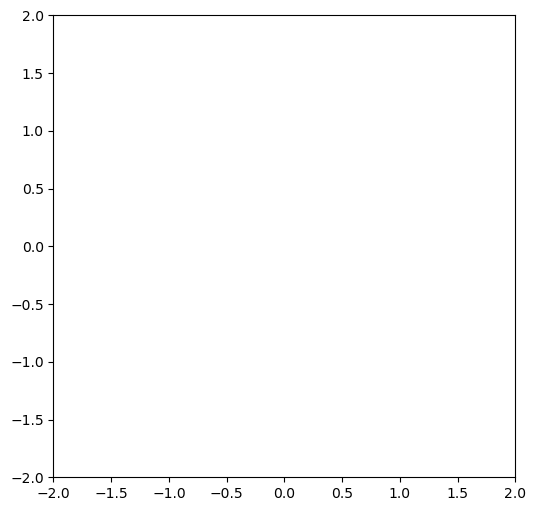

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# 创建椭圆体
def create_ellipsoid(a=1, b=1, c=1, num_points=1000):
    """ 创建椭圆体的顶点 """
    phi = np.linspace(0, 2 * np.pi, num_points)
    theta = np.linspace(0, np.pi, num_points)
    phi, theta = np.meshgrid(phi, theta)

    x = a * np.sin(theta) * np.cos(phi)
    y = b * np.sin(theta) * np.sin(phi)
    z = c * np.cos(theta)
    
    vertices = np.vstack([x.flatten(), y.flatten(), z.flatten()]).T
    return vertices

# 创建一个简单的多面体（例如：四面体）
def create_tetrahedron():
    """ 创建一个四面体的顶点和面 """
    vertices = np.array([
        [1, 1, 1],
        [-1, -1, 1],
        [-1, 1, -1],
        [1, -1, -1]
    ])
    faces = [
        [vertices[0], vertices[1], vertices[2]],
        [vertices[0], vertices[1], vertices[3]],
        [vertices[0], vertices[2], vertices[3]],
        [vertices[1], vertices[2], vertices[3]]
    ]
    return vertices, faces

# 创建飞机形状（简单的矩形和圆柱体组合）
def create_airplane():
    """ 创建一个简单的飞机模型（矩形机身和圆柱形机翼） """
    # 创建机身（一个长方体）
    body_vertices = np.array([
        [-1, -0.5, 0],
        [ 1, -0.5, 0],
        [ 1,  0.5, 0],
        [-1,  0.5, 0],
        [-1, -0.5, 5],
        [ 1, -0.5, 5],
        [ 1,  0.5, 5],
        [-1,  0.5, 5]
    ])
    body_faces = [
        [body_vertices[0], body_vertices[1], body_vertices[2], body_vertices[3]],
        [body_vertices[4], body_vertices[5], body_vertices[6], body_vertices[7]],
        [body_vertices[0], body_vertices[1], body_vertices[5], body_vertices[4]],
        [body_vertices[1], body_vertices[2], body_vertices[6], body_vertices[5]],
        [body_vertices[2], body_vertices[3], body_vertices[7], body_vertices[6]],
        [body_vertices[3], body_vertices[0], body_vertices[4], body_vertices[7]],
    ]
    
    # 创建机翼（一个圆柱体）
    # 可以使用类似创建圆的方式在不同高度位置生成机翼
    wing_vertices = []
    for angle in np.linspace(0, 2 * np.pi, 20): 
        wing_vertices.append([10 * np.cos(angle), 0, 2])  # 机翼的圆
    wing_vertices = np.array(wing_vertices)
    
    return body_vertices, body_faces, wing_vertices

# 旋转矩阵
def rotation_matrix(axis, angle):
    """ 根据轴和角度生成旋转矩阵 """
    axis = axis / np.linalg.norm(axis)  # 归一化旋转轴
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    ux, uy, uz = axis
    return np.array([
        [cos_angle + ux**2 * (1 - cos_angle), ux * uy * (1 - cos_angle) - uz * sin_angle, ux * uz * (1 - cos_angle) + uy * sin_angle],
        [uy * ux * (1 - cos_angle) + uz * sin_angle, cos_angle + uy**2 * (1 - cos_angle), uy * uz * (1 - cos_angle) - ux * sin_angle],
        [uz * ux * (1 - cos_angle) - uy * sin_angle, uz * uy * (1 - cos_angle) + ux * sin_angle, cos_angle + uz**2 * (1 - cos_angle)]
    ])

# 投影函数
def perspective_projection(vertices, focal_length=2):
    """ 透视投影将3D点投影到2D平面 """
    projected_vertices = []
    for vertex in vertices:
        x, y, z = vertex
        # 透视投影公式
        x_p = (focal_length * x) / (z + focal_length)
        y_p = (focal_length * y) / (z + focal_length)
        projected_vertices.append([x_p, y_p])
    return np.array(projected_vertices)

# 绘制目标函数
def plot_3d_to_2d(vertices, faces, ax):
    """ 将3D目标投影到2D图像并绘制目标的面 """
    projected = perspective_projection(vertices)
    
    # 构建KDTree来快速查找最接近的顶点
    tree = cKDTree(projected)
    
    # 绘制形状的每个面
    for face in faces:
        poly = []
        for v in face:
            # 寻找与 v 近似的顶点在 vertices 中的位置
            proj_v = perspective_projection([v])[0]  # 投影后的2D坐标
            _, idx = tree.query(proj_v)  # 查找最近的顶点
            poly.append(projected[idx])
        poly = np.array(poly)
        ax.fill(poly[:, 0], poly[:, 1], color="black")  # 用黑色填充面

# 创建一个3D目标（选择不同的目标）
shape_type = 'ellipsoid'  # 'ellipsoid', 'tetrahedron', 'airplane'
if shape_type == 'ellipsoid':
    vertices = create_ellipsoid(a=1, b=1, c=1)
    faces = []  # 椭圆体没有明显的面，通常用于点云可视化
elif shape_type == 'tetrahedron':
    vertices, faces = create_tetrahedron()
elif shape_type == 'airplane':
    body_vertices, body_faces, wing_vertices = create_airplane()
    vertices = np.vstack([body_vertices, wing_vertices])
    faces = body_faces
else:
    raise ValueError("Unsupported shape type")

# 创建图像和绘图轴
fig, ax = plt.subplots(figsize=(6, 6))

# 模拟50帧的运动
num_frames = 50
for frame in range(num_frames):
    ax.clear()  # 清除之前的绘制内容
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal', 'box')
    ax.set_facecolor('white')  # 设置背景为白色
    
    # 计算当前帧的旋转、缩放和位置
    angle = np.radians(frame * 1)  # 每帧旋转1度
    scale = 1
    translation = 0
    # 旋转、缩放和位移
    rotation = rotation_matrix(np.array([0, 1, 0]), angle)  # 绕y轴旋转
    transformed_vertices = np.dot(vertices, rotation.T) + translation

    # 将3D目标投影到2D并绘制
    plot_3d_to_2d(transformed_vertices, faces, ax)

    # 绘制完成，保存当前帧为图像
    plt.savefig(f'./imgs/frame_{frame}.png')

# 展示最后一帧
plt.show()


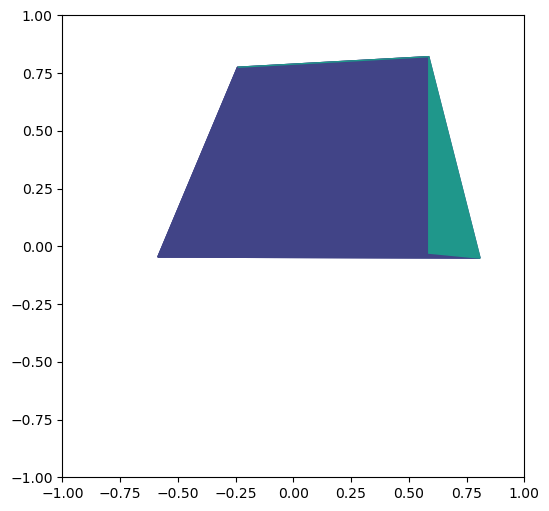

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# 3D目标模型：一个立方体
def create_cube(size=1):
    """ 创建一个立方体，返回其8个顶点的坐标和12个面 """
    vertices = np.array([
        [-size, -size, -size],
        [ size, -size, -size],
        [ size,  size, -size],
        [-size,  size, -size],
        [-size, -size,  size],
        [ size, -size,  size],
        [ size,  size,  size],
        [-size,  size,  size]
    ])
    
    # 定义立方体的12个面（每个面是一个由4个顶点组成的面）
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # 前面
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # 后面
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # 左面
        [vertices[1], vertices[2], vertices[6], vertices[5]],  # 下面
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # 右面
        [vertices[3], vertices[0], vertices[4], vertices[7]],  # 上面
    ]
    
    return vertices, faces

# 旋转矩阵
def rotation_matrix(axis, angle):
    """ 根据轴和角度生成旋转矩阵 """
    axis = axis / np.linalg.norm(axis)  # 归一化旋转轴
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)
    ux, uy, uz = axis
    return np.array([
        [cos_angle + ux**2 * (1 - cos_angle), ux * uy * (1 - cos_angle) - uz * sin_angle, ux * uz * (1 - cos_angle) + uy * sin_angle],
        [uy * ux * (1 - cos_angle) + uz * sin_angle, cos_angle + uy**2 * (1 - cos_angle), uy * uz * (1 - cos_angle) - ux * sin_angle],
        [uz * ux * (1 - cos_angle) - uy * sin_angle, uz * uy * (1 - cos_angle) + ux * sin_angle, cos_angle + uz**2 * (1 - cos_angle)]
    ])

# 投影函数
def perspective_projection(vertices, focal_length=2):
    """ 透视投影将3D点投影到2D平面 """
    projected_vertices = []
    for vertex in vertices:
        x, y, z = vertex
        # 透视投影公式
        x_p = (focal_length * x) / (z + focal_length)
        y_p = (focal_length * y) / (z + focal_length)
        projected_vertices.append([x_p, y_p])
    return np.array(projected_vertices)

# 光照模型
def calculate_lighting(normal, light_direction, ambient=0.2, diffuse=0.8, specular=0.5, shininess=32):
    """ 计算Phong光照模型中的光照强度 """
    normal = normal / np.linalg.norm(normal)  # 单位化法线
    light_direction = light_direction / np.linalg.norm(light_direction)  # 单位化光线方向
    
    # 环境光
    ambient_light = ambient
    
    # 漫反射光
    diffuse_light = diffuse * max(np.dot(normal, light_direction), 0)
    
    # 镜面反射光
    reflection = 2 * np.dot(normal, light_direction) * normal - light_direction
    specular_light = specular * (max(np.dot(reflection, np.array([0, 0, 1])), 0) ** shininess)
    
    return ambient_light + diffuse_light + specular_light

# 绘制目标函数
def plot_3d_to_2d(vertices, faces, ax, light_direction):
    """ 将3D目标投影到2D图像并绘制目标的面 """
    projected = perspective_projection(vertices)
    
    # 构建KDTree来快速查找最接近的顶点
    tree = cKDTree(projected)
    
    # 绘制立方体的每个面
    for face in faces:
        poly = []
        face_normals = []
        for v in face:
            # 寻找与 v 近似的顶点在 vertices 中的位置
            proj_v = perspective_projection([v])[0]  # 投影后的2D坐标
            _, idx = tree.query(proj_v)  # 查找最近的顶点
            poly.append(projected[idx])
            
            # 计算法线，假设面是平的，四边形面使用前三个顶点计算法线
            if len(face) == 4:
                v0, v1, v2, _ = face  # 拿前3个顶点计算法线
            else:
                v0, v1, v2 = face  # 三角形面直接用3个顶点
            edge1 = v1 - v0
            edge2 = v2 - v0
            normal = np.cross(edge1, edge2)
            face_normals.append(normal)
        
        poly = np.array(poly)
        
        # 为面着色（使用光照强度）
        normal = np.mean(face_normals, axis=0)
        light_intensity = calculate_lighting(normal, light_direction)
        color = plt.cm.viridis(light_intensity)
        
        ax.fill(poly[:, 0], poly[:, 1], color=color)  # 用颜色填充面

# 创建一个3D立方体
cube_vertices, cube_faces = create_cube(size=0.5)  # 目标缩小，设置立方体的尺寸为0.5

# 创建图像和绘图轴
fig, ax = plt.subplots(figsize=(6, 6))

# 模拟50帧的运动
num_frames = 50
for frame in range(num_frames):
    ax.clear()  # 清除之前的绘制内容
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal', 'box')
    ax.set_facecolor('white')  # 设置背景为白色
    
    # 计算当前帧的旋转、缩放和位置
    angle = np.radians(frame * 2)  # 每帧旋转5度
    scale = 1 + 0.05 * np.sin(np.radians(frame * 10))  # 缩放，让目标的变化更小
    translation = [0.5 * np.sin(np.radians(frame * 15)), 0.5 * np.cos(np.radians(frame * 15)), 0]  # 平移

    # 旋转、缩放和位移
    rotation = rotation_matrix(np.array([0, 1, 0]), angle)  # 绕y轴旋转
    scaled_vertices = cube_vertices * scale
    transformed_vertices = np.dot(scaled_vertices, rotation.T) + translation

    # 设置光源方向（从上方照射）
    light_direction = np.array([0.5, 0.5, -1])
    
    # 将3D目标投影到2D并绘制
    plot_3d_to_2d(transformed_vertices, cube_faces, ax, light_direction)

    # 绘制完成，保存当前帧为图像
    plt.savefig(f'./imgs/frame_{frame}.png')

# 展示最后一帧
plt.show()


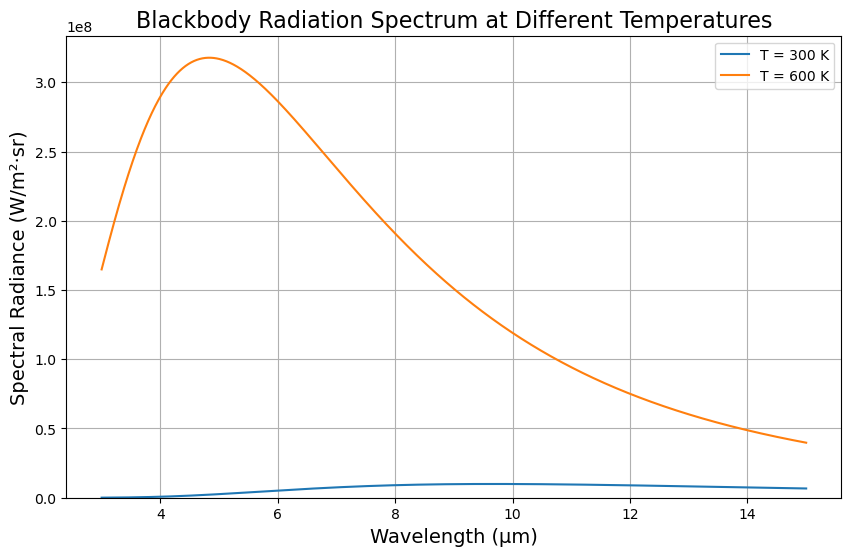

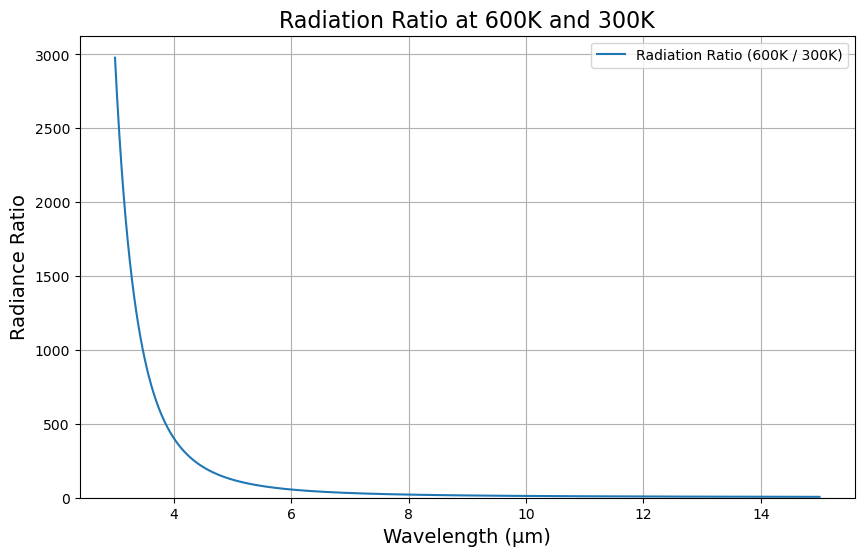

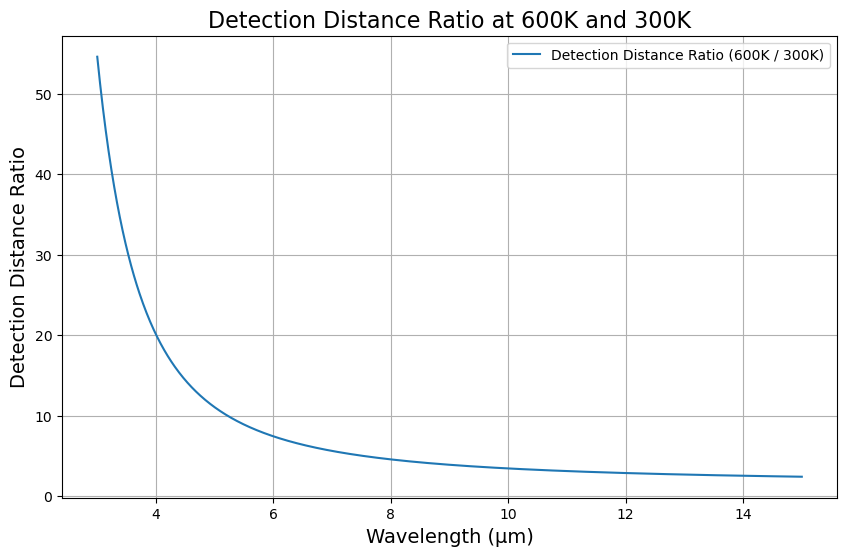

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.62607015e-34  # Planck's constant (J·s)
c = 3.0e8           # Speed of light (m/s)
k = 1.380649e-23    # Boltzmann constant (J/K)

# Planck's law: returns spectral radiance as a function of wavelength and temperature
def plancks_law(wavelength, temperature):
    return (2.0 * h * c**2) / ((wavelength ** 5) *  (np.exp((h * c) / (wavelength * k * temperature)) - 1.0))

# Wavelength range (in meters)
wavelengths = np.linspace(3e-6, 15e-6, 1000)  # From 220 nm to 15 µm

# Temperatures to plot (in Kelvin)
temperatures = [300, 600]  # Examples: cooler stars to sun's surface temperature

# Plotting
plt.figure(figsize=(10, 6))

for T in temperatures:
    spectral_radiance = plancks_law(wavelengths, T)
    plt.plot(wavelengths * 1e6, spectral_radiance, label=f'T = {T} K')

# Labels and title
plt.title('Blackbody Radiation Spectrum at Different Temperatures', fontsize=16)
plt.xlabel('Wavelength (µm)', fontsize=14)
plt.ylabel('Spectral Radiance (W/m²·sr)', fontsize=14)
plt.legend()
plt.grid(True)
# plt.xlim(0, 3000)  # Limit wavelength to 3000 nm
plt.ylim(0, None)

# Show plot
plt.show()

# Calculate the ratio of spectral radiance between two temperatures
def radiation_ratio(wavelength, temp1, temp2):
    spectral_radiance_1 = plancks_law(wavelength, temp1)
    spectral_radiance_2 = plancks_law(wavelength, temp2)
    return spectral_radiance_2 / spectral_radiance_1

# Calculate the ratio for each wavelength
ratios = radiation_ratio(wavelengths, 300, 600)

# Plot the ratio of spectral radiance
plt.figure(figsize=(10, 6))
plt.plot(wavelengths * 1e6, ratios, label=f'Radiation Ratio (600K / 300K)')

# Labels and title
plt.title('Radiation Ratio at 600K and 300K', fontsize=16)
plt.xlabel('Wavelength (µm)', fontsize=14)
plt.ylabel('Radiance Ratio', fontsize=14)
plt.legend()
plt.grid(True)
plt.ylim(0, None)

# Show plot
plt.show()


# Calculate the ratio for each wavelength
detection_distances = np.sqrt(radiation_ratio(wavelengths, 300, 600))

# Plot the detection distance as a function of intensity
plt.figure(figsize=(10, 6))
plt.plot(wavelengths * 1e6, detection_distances, label='Detection Distance Ratio (600K / 300K)')

# Labels and title
plt.title('Detection Distance Ratio at 600K and 300K', fontsize=16)
plt.xlabel('Wavelength (µm)', fontsize=14)
plt.ylabel('Detection Distance Ratio', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [3]:
import random
import numpy as np

def generate_random_numbers_sum_to_one(n):
    """
    生成n个随机正数，这些数的总和为1
    """
    random_numbers = np.random.rand(n)
    return random_numbers / np.sum(random_numbers)

def generate_arrays(M, N):
    arrays = []
    corresponding_sums = []

    # 生成M个数组
    for _ in range(M):
        length = random.randint(1, N)  # 数组的长度在1到N之间
        array = [random.choice([0, 1, 2, 3]) for _ in range(length)]  # 随机生成0,1,2,3中的整数
        arrays.append(array)
        
        # 生成与该数组长度完全对应的和为1的数组
        sum_array = generate_random_numbers_sum_to_one(length)
        corresponding_sums.append(sum_array.tolist())

    return arrays, corresponding_sums

# 使用示例
M = 5  # 生成5个数组
N = 4  # 每个数组的长度最多为10

arrays, corresponding_sums = generate_arrays(M, N)

# 输出生成的数组和对应的和为1的数组
for i in range(M):
    print(f"Array {i+1}: {arrays[i]}")
    print(f"Corresponding sum array {i+1}: {corresponding_sums[i]}")


Array 1: [1, 2, 0]
Corresponding sum array 1: [0.49163207515421764, 0.37028456492192474, 0.13808335992385753]
Array 2: [1, 1, 1]
Corresponding sum array 2: [0.09840106157752754, 0.5195672156123121, 0.3820317228101603]
Array 3: [2, 1]
Corresponding sum array 3: [0.18271540909631598, 0.817284590903684]
Array 4: [2, 3, 1]
Corresponding sum array 4: [0.48635143491235255, 0.20912181056371779, 0.3045267545239297]
Array 5: [1, 0, 1]
Corresponding sum array 5: [0.3820990699526006, 0.07201658866564668, 0.5458843413817528]


In [ ]:
import numpy as np

# 灰体辐射强度计算函数
def gray_body_radiation_wavelength(epsilon, T, wavelength, r):
    """
    计算灰体辐射强度在特定波长下，并考虑距离的衰减。
    :param epsilon: 辐射率（无量纲）
    :param T: 温度（K）
    :param wavelength: 波长（m）
    :param r: 距离（m）
    :return: 距离 r 处的辐射强度（W/m²）
    """
    # 常数定义
    h = 6.626e-34  # 普朗克常数 (J·s)
    c = 3e8        # 光速 (m/s)
    k = 1.381e-23  # 玻尔兹曼常数 (J/K)

    # 使用普朗克定律计算在特定波长下的辐射强度
    I_lambda = (2 * h * c**2) / (wavelength**5) * (1 / (np.exp((h * c) / (wavelength * k * T)) - 1))
    # 应用逆平方定律，计算距离 r 处的辐射强度
    I_r = epsilon * I_lambda / r**2
    
    return I_r


# 输入参数
epsilon = 0.8     # 灰体的辐射率
T = 600           # 灰体的温度 (K)
wavelength = 10e-6 # 波长 (10 micrometers，即红外波段)
r = 3000             # 距离 (m)

# 计算灰体辐射强度
I_r = gray_body_radiation_wavelength(epsilon, T, wavelength, r)

print(I_r)

# 参数设置
S = 0.5  # 传感器的灵敏度 (V / (W/m²))
A = 100  # 增益因子 (单位：V / L)
B = 0    # 偏置
t_exp = 0.01  # 曝光时间 (秒)

# 假设目标的辐射强度 (W/m²)
I = I_r  # 辐射强度

# 计算电信号
V_signal = S * I * t_exp

# 转换为像素值 (假设像素值在 0 到 255 之间)
P = np.round(A * V_signal + B)
print(P)

在 3000 米处，波长 1e-05 m 的灰体辐射强度: 1.06e+01 W/m²
5.0


In [63]:
import math
import numpy as np

D = 1500
base_D = 3000
np.clip(np.log(np.log(base_D**2 / D**2 + 1) + 1), 0, 1)

0.959134838920824

In [1]:
import numpy as np
import random

# 生成随机正数，总和为1
def generate_random_numbers_sum_to_one(n):
    random_numbers = np.random.rand(n)
    return random_numbers / random_numbers.sum()

# 生成多个目标的运动模式和时间占比
def generate_arrays(M, N):
    arrays = []
    corresponding_sums = []

    for _ in range(M):
        length = random.randint(1, N)  # 数组的长度在1到N之间
        array = [random.choice([0, 1, 2, 3]) for _ in range(length)]  # 随机生成0,1,2,3中的整数
        arrays.append(array)

        # 生成与该数组长度完全对应的和为1的数组
        sum_array = generate_random_numbers_sum_to_one(length)
        corresponding_sums.append(sum_array.tolist())

    return arrays, corresponding_sums

# 获取位移
def get_displacement(motion_mode, init_velocity, max_velocity, direction_coef, acceleration_factor, a0, k, t, fps):
    x_coef, y_coef, z_coef = direction_coef

    if motion_mode == 0:  # 'uniform' 匀速
        velocity = min(init_velocity, max_velocity)  # 确保速度不超过最大速度
        displacement = velocity * t  # 位移随时间线性增加

    elif motion_mode == 1:  # 'uniform_acceleration' 匀加速
        velocity = init_velocity + acceleration_factor * t  # 速度随时间增加
        velocity = min(velocity, max_velocity)  # 确保速度不超过最大速度
        displacement = init_velocity * t + 0.5 * acceleration_factor * t**2  # 位移考虑初始速度

    elif motion_mode == 2:  # 'variable_acceleration' 变加速
        acceleration = a0 + k * t  # 加速度随时间变化
        velocity = init_velocity + a0 * t + 0.5 * k * t**2  # 速度随时间变化，考虑初始速度
        velocity = min(velocity, max_velocity)  # 确保速度不超过最大速度
        displacement = init_velocity * t + 0.5 * a0 * t**2 + (1/6) * k * t**3  # 位移考虑初始速度和变加速

    elif motion_mode == 3:  # 'random_motion' 随机运动
        # 初始化速度和位移
        velocity = init_velocity
        displacement = 0

        # 动态时间步长
        time_step = 1 / fps  # 使用帧率作为时间步长
        num_steps = int(t * fps)  # 计算时间步长内的步数

        # 随机生成加速度变化
        random_accelerations = np.random.uniform(-1, 1, num_steps)
        velocities = np.cumsum(random_accelerations) + velocity
        velocities = np.clip(velocities, 0, max_velocity)  # 确保速度不超过最大速度
        displacements = np.cumsum(velocities) * time_step
        displacement = displacements[-1]

    else:
        raise ValueError("Invalid motion mode")

    displacement_x = displacement * x_coef
    displacement_y = displacement * y_coef
    displacement_z = displacement * z_coef

    return displacement_x, displacement_y, displacement_z

# 计算目标的累计位移
def calculate_cumulative_displacements_for_targets(total_frames, fps, init_velocity, max_velocity, direction_coef, acceleration_factor, a0, k, M, N):
    motion_modes, time_ratios = generate_arrays(M, N)
    frame_time = 1 / fps
    all_cumulative_displacements = []

    for target_index in range(M):
        target_cumulative_displacements = []
        cumulative_displacement_x = 0
        cumulative_displacement_y = 0
        cumulative_displacement_z = 0

        for mode, ratio in zip(motion_modes[target_index], time_ratios[target_index]):
            num_frames = int(ratio * total_frames)
            for _ in range(num_frames):
                displacement_x, displacement_y, displacement_z = get_displacement(
                    mode, init_velocity, max_velocity, direction_coef, acceleration_factor, a0, k, frame_time, fps)
                
                cumulative_displacement_x += displacement_x
                cumulative_displacement_y += displacement_y
                cumulative_displacement_z += displacement_z
                
                target_cumulative_displacements.append((cumulative_displacement_x, cumulative_displacement_y, cumulative_displacement_z))

            if len(target_cumulative_displacements) >= total_frames:
                break

        # 如果生成的帧数少于总帧数，填充剩余帧数
        while len(target_cumulative_displacements) < total_frames:
            target_cumulative_displacements.append(target_cumulative_displacements[-1])

        all_cumulative_displacements.append(target_cumulative_displacements[:total_frames])

    return np.array(all_cumulative_displacements)

# 示例调用
total_frames = 1500  # 总帧数
fps = 50  # 帧率，每秒50帧
init_velocity = 250  # 初始速度 (m/s)
max_velocity = 900  # 最大速度 (m/s)
direction_coef = (0.5, 0.3, 0.2)  # 方向系数，假设飞机只在x轴上运动
acceleration_factor = 50  # 加速度因子 (m/s^2)
a0 = 20  # 初始加速度 (m/s^2)
k = 5  # 加速度变化率 (m/s^3)
M = 10000  # 目标数量
N = 4  # 每个目标的最大运动模式数量

all_cumulative_displacements = calculate_cumulative_displacements_for_targets(total_frames, fps, init_velocity, max_velocity, direction_coef, acceleration_factor, a0, k, M, N)

# # 打印所有目标的全部累计位移
# for target_index in range(M):
#     print(f"Target {target_index + 1} cumulative displacements:")
#     for frame_index in range(len(all_cumulative_displacements[target_index])):
#         print(f"Frame {frame_index + 1}: Cumulative Displacement = {all_cumulative_displacements[target_index][frame_index]}")
#     print()

In [82]:
import numpy as np
import random

# 生成随机正数，总和为1
def generate_random_numbers_sum_to_one(n):
    random_numbers = np.random.rand(n)
    return random_numbers / random_numbers.sum()

# 生成多个目标的运动模式和时间占比
def generate_arrays(M, N):
    arrays = []
    corresponding_sums = []

    for _ in range(M):
        length = random.randint(1, N)  # 数组的长度在1到N之间
        array = [random.choice([0, 1, 2, 3]) for _ in range(length)]  # 随机生成0,1,2,3中的整数
        arrays.append(array)

        # 生成与该数组长度完全对应的和为1的数组
        sum_array = generate_random_numbers_sum_to_one(length)
        corresponding_sums.append(sum_array.tolist())

    return arrays, corresponding_sums

# 获取位移
def get_displacement(motion_mode, init_velocity, max_velocity, direction_coef, acceleration_factor, a0, k, t, fps):
    x_coef, y_coef, z_coef = direction_coef

    if motion_mode == 0:  # 'uniform' 匀速
        velocity = min(init_velocity, max_velocity)  # 确保速度不超过最大速度
        displacement = velocity * t  # 位移随时间线性增加

    elif motion_mode == 1:  # 'uniform_acceleration' 匀加速
        velocity = init_velocity + acceleration_factor * t  # 速度随时间增加
        velocity = min(velocity, max_velocity)  # 确保速度不超过最大速度
        displacement = init_velocity * t + 0.5 * acceleration_factor * t**2  # 位移考虑初始速度

    elif motion_mode == 2:  # 'variable_acceleration' 变加速
        acceleration = a0 + k * t  # 加速度随时间变化
        velocity = init_velocity + a0 * t + 0.5 * k * t**2  # 速度随时间变化，考虑初始速度
        velocity = min(velocity, max_velocity)  # 确保速度不超过最大速度
        displacement = init_velocity * t + 0.5 * a0 * t**2 + (1/6) * k * t**3  # 位移考虑初始速度和变加速

    elif motion_mode == 3:  # 'random_motion' 随机运动
        # 初始化速度和位移
        velocity = init_velocity
        displacement = 0

        # 动态时间步长
        time_step = 1 / fps  # 使用帧率作为时间步长
        num_steps = int(t * fps)  # 计算时间步长内的步数

        # 随机生成加速度变化
        random_accelerations = np.random.uniform(-1, 1, num_steps)
        velocities = np.cumsum(random_accelerations) + velocity
        velocities = np.clip(velocities, 0, max_velocity)  # 确保速度不超过最大速度
        displacements = np.cumsum(velocities) * time_step
        displacement = displacements[-1]

    else:
        raise ValueError("Invalid motion mode")

    displacement_x = displacement * x_coef
    displacement_y = displacement * y_coef
    displacement_z = displacement * z_coef

    return displacement_x, displacement_y, displacement_z

# 计算目标的累计位移
def calculate_cumulative_displacements_for_targets(total_frames, fps, init_velocity, max_velocity, direction_coef, acceleration_factor, a0, k, M, N, x_range, y_range):
    motion_modes, time_ratios = generate_arrays(M, N)
    print(motion_modes)
    frame_time = 1 / fps
    all_cumulative_displacements = []

    x_min, x_max = x_range
    y_min, y_max = y_range

    for target_index in range(M):
        target_cumulative_displacements = []
        cumulative_displacement_x = 0
        cumulative_displacement_y = 0
        cumulative_displacement_z = 0

        for mode, ratio in zip(motion_modes[target_index], time_ratios[target_index]):
            num_frames = int(ratio * total_frames)
            for _ in range(num_frames):
                displacement_x, displacement_y, displacement_z = get_displacement(
                    mode, init_velocity, max_velocity, direction_coef, acceleration_factor, a0, k, frame_time, fps)

                cumulative_displacement_x += displacement_x
                cumulative_displacement_y += displacement_y
                cumulative_displacement_z += displacement_z

                # 检查是否超出范围，如果超出则调整方向
                if cumulative_displacement_x < x_min or cumulative_displacement_x > x_max:
                    direction_coef = (-direction_coef[0], direction_coef[1], direction_coef[2])
                    cumulative_displacement_x = max(min(cumulative_displacement_x, x_max), x_min)
                if cumulative_displacement_y < y_min or cumulative_displacement_y > y_max:
                    direction_coef = (direction_coef[0], -direction_coef[1], direction_coef[2])
                    cumulative_displacement_y = max(min(cumulative_displacement_y, y_max), y_min)

                target_cumulative_displacements.append((cumulative_displacement_x, cumulative_displacement_y, cumulative_displacement_z))

            if len(target_cumulative_displacements) >= total_frames:
                break

        # 如果生成的帧数少于总帧数，填充剩余帧数
        while len(target_cumulative_displacements) < total_frames:
            target_cumulative_displacements.append(target_cumulative_displacements[-1])

        all_cumulative_displacements.append(target_cumulative_displacements[:total_frames])

    return np.array(all_cumulative_displacements)

# 示例调用
total_frames = 15000  # 总帧数
fps = 50  # 帧率，每秒50帧
init_velocity = 200  # 初始速度 (m/s)
max_velocity = 800  # 最大速度 (m/s)
direction_coef = (1, 0, 0)  # 方向系数，假设飞机在 x, y, z 轴上运动
acceleration_factor = 400  # 加速度因子 (m/s^2)
a0 = 100  # 初始加速度 (m/s^2)
k = 50  # 加速度变化率 (m/s^3)
M = 1  # 目标数量
N = 4  # 每个目标的最大运动模式数量
x_range = (-1000, 1000)  # x 轴范围
y_range = (-1000, 1000)  # y 轴范围

all_cumulative_displacements = calculate_cumulative_displacements_for_targets(total_frames, fps, init_velocity, max_velocity, direction_coef, acceleration_factor, a0, k, M, N, x_range, y_range)

# 打印所有目标的全部累计位移
for target_index in range(M):
    print(f"Target {target_index + 1} cumulative displacements:")
    for frame_index in range(len(all_cumulative_displacements[target_index])):
        print(f"Frame {frame_index + 1}: Cumulative Displacement = {all_cumulative_displacements[target_index][frame_index]}")

[[3, 2]]
Target 1 cumulative displacements:
Frame 1: Cumulative Displacement = [3.98192995 0.         0.        ]
Frame 2: Cumulative Displacement = [7.98066154 0.         0.        ]
Frame 3: Cumulative Displacement = [11.98876757  0.          0.        ]
Frame 4: Cumulative Displacement = [15.99050928  0.          0.        ]
Frame 5: Cumulative Displacement = [19.97270805  0.          0.        ]
Frame 6: Cumulative Displacement = [23.98085756  0.          0.        ]
Frame 7: Cumulative Displacement = [27.97010368  0.          0.        ]
Frame 8: Cumulative Displacement = [31.95323692  0.          0.        ]
Frame 9: Cumulative Displacement = [35.95202183  0.          0.        ]
Frame 10: Cumulative Displacement = [39.9395969  0.         0.       ]
Frame 11: Cumulative Displacement = [43.94582606  0.          0.        ]
Frame 12: Cumulative Displacement = [47.93534093  0.          0.        ]
Frame 13: Cumulative Displacement = [51.94202803  0.          0.        ]
Frame 14: Cu

In [105]:
import os
import cv2
import numpy as np

def save_images_and_annotations(output_folder, images, annotations):
    """
    Save generated images and their annotations to the specified folder.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for i, (image, annot) in enumerate(zip(images, annotations)):
        image_filename = os.path.join(output_folder, f"{i:04d}.png")
        annot_filename = os.path.join(output_folder, f"{i:04d}.txt")

        # Save image
        success = cv2.imwrite(image_filename, image)
        if not success:
            print(f"Failed to save image {image_filename}")
        else:
            print(f"Image saved: {image_filename}")

        # Save annotation
        with open(annot_filename, 'w') as annot_file:
            annot_file.write(annot)
            print(f"Annotation saved: {annot_filename}")

# Example usage
output_folder = "/home/guantp/Infrared/MIRST/motive_target_gen/imgs/"
images = np.random.randint(0, 256, (399, 256, 256), dtype=np.uint8)  # Example image data
annotations = ["Annotation " + str(i) for i in range(399)]  # Example annotations

save_images_and_annotations(output_folder, images, annotations)

Image saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0000.png
Annotation saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0000.txt
Image saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0001.png
Annotation saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0001.txt
Image saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0002.png
Annotation saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0002.txt
Image saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0003.png
Annotation saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0003.txt
Image saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0004.png
Annotation saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0004.txt
Image saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0005.png
Annotation saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0005.txt
Image saved: /home/guantp/Infrared/MIRST/motive_target_gen/imgs/0006.png
Annotation saved: /ho

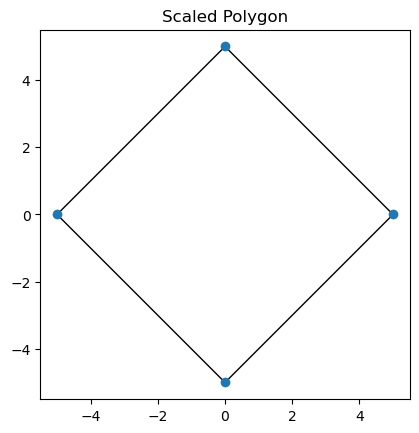

In [110]:
import matplotlib.pyplot as plt
import numpy as np

def generate_polygon(sides, radius, scale=1):
    """
    生成一个多边形的顶点坐标。
    
    参数:
    - sides: 多边形的边数
    - radius: 多边形的半径
    - scale: 缩放比例，默认为1
    
    返回:
    - 多边形的顶点坐标列表
    """
    # 计算每个顶点的角度
    angles = np.linspace(0, 2 * np.pi, sides, endpoint=False)
    
    # 计算每个顶点的坐标
    x = radius * np.cos(angles) * scale
    y = radius * np.sin(angles) * scale
    
    return x, y

def plot_polygon(x, y, title="Polygon"):
    """
    绘制一个多边形。
    
    参数:
    - x: 多边形的x坐标列表
    - y: 多边形的y坐标列表
    - title: 图形标题
    """
    plt.figure()
    plt.fill(x, y, edgecolor='black', fill=False)
    plt.plot(x, y, 'o')  # 标记顶点
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# 示例调用
sides = 4  # 多边形的边数，例如六边形
radius = 1  # 多边形的半径
scale = 5  # 缩放比例

x, y = generate_polygon(sides, radius, scale)
plot_polygon(x, y, title="Scaled Polygon")

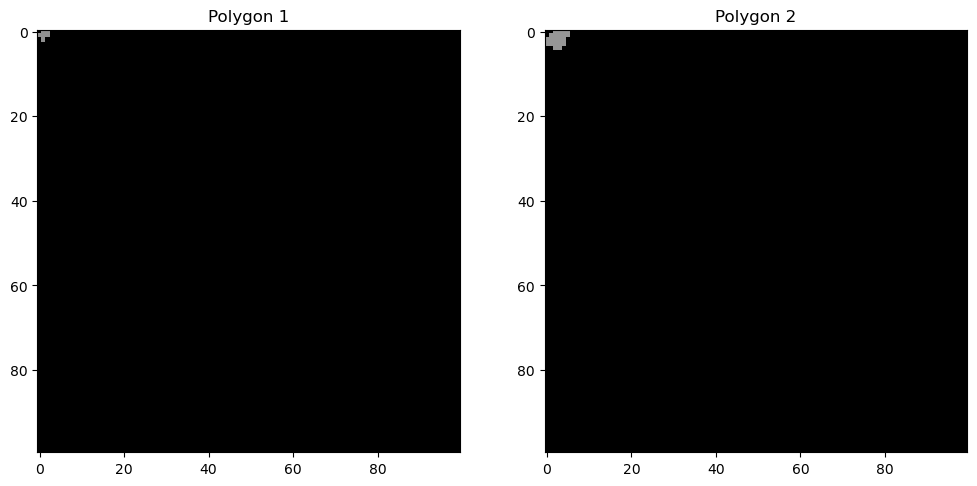

In [236]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

def generate_irregular_polygon_points(num_points):
    # 初始化第一个顶点的极坐标角度
    initial_angle = np.random.uniform(0, 2 * np.pi)
    
    # 生成其他顶点的不规则极坐标角度
    angles = np.sort(np.random.uniform(0, 2 * np.pi, num_points - 1))
    angles = np.concatenate([[initial_angle], angles + initial_angle]) % (2 * np.pi)
    return angles

def polygon_gen(h, w, target, background_std, background_mean, angles=None):
    if angles is None:
        num_points = random.randint(3, 10)
        angles = generate_irregular_polygon_points(num_points)
    
    # 计算多边形的半径
    radius = 1  # 使用标准化的半径
    
    # 计算顶点的标准化坐标
    points = np.array([[radius * np.cos(angle), radius * np.sin(angle)] for angle in angles])
    
    # 计算目标的缩放因子
    max_dim = max(h, w)
    scale = max_dim / 2

    # 缩放顶点并移动到目标中心
    points = points * scale
    points[:, 0] += w / 2  # 移动到目标中心
    points[:, 1] += h / 2  # 移动到目标中心
    points = points.astype(np.int32).reshape((-1, 1, 2))

    # 生成多边形颜色
    _temp = np.random.uniform(0.8, 1) * background_std
    color = np.clip(_temp + background_mean, 0, 255)
    
    # 绘制多边形
    cv2.fillPoly(target, [points], color)
    
    return angles

# 示例调用
# 目标大小
h1, w1 = 2, 3
target1 = np.zeros((100, 100, 1), dtype=np.uint8)
background_std = 50
background_mean = 100

angles = polygon_gen(h1, w1, target1, background_std, background_mean)

# 修改目标大小并保持多边形形状
h2, w2 = 4, 6
target2 = np.zeros((100, 100, 1), dtype=np.uint8)
polygon_gen(h2, w2, target2, background_std, background_mean, angles)

# 使用matplotlib显示结果图像
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 左图
axes[0].imshow(cv2.cvtColor(target1, cv2.COLOR_BGR2RGB))
axes[0].set_title("Polygon 1")

# 右图
axes[1].imshow(cv2.cvtColor(target2, cv2.COLOR_BGR2RGB))
axes[1].set_title("Polygon 2")

plt.show()

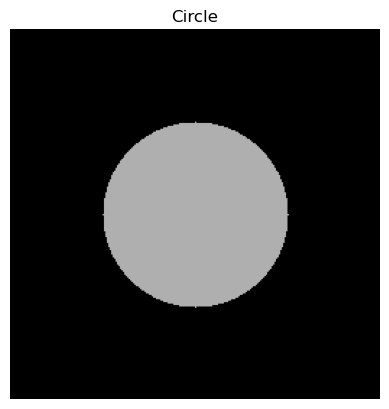

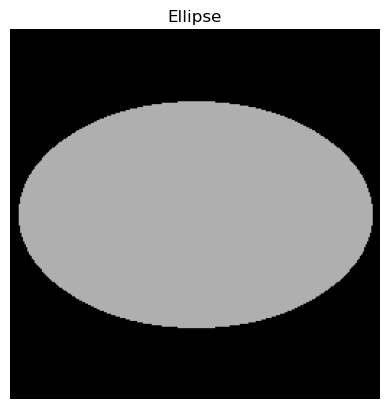

In [237]:
import numpy as np
import cv2
import random

def circle_gen(h, w, target, scale, background_std, background_mean):
    """
    生成一个圆形，并将其绘制到目标图像上。
    
    参数:
    - h: 图像的高度
    - w: 图像的宽度
    - target: 目标图像
    - scale: 缩放因子，用于调整圆形的亮度
    - background_std: 背景标准差，用于生成圆形颜色
    - background_mean: 背景平均值，用于生成圆形颜色
    """
    center = (w // 2, h // 2)
    radius = max(min(h, w) // 4, 1)
    
    # 生成圆形颜色
    color = np.clip(scale * background_std + background_mean, 0, 255)
    color = int(color)  # OpenCV expects color to be an integer
    
    # 绘制圆形
    cv2.circle(target, center, radius, (color, color, color), -1)
    
    return 

def ellipse_gen(h, w, target, scale, background_std, background_mean, axis=None):
    """
    生成一个椭圆形，并将其绘制到目标图像上。
    
    参数:
    - h: 图像的高度
    - w: 图像的宽度
    - target: 目标图像
    - scale: 缩放因子，用于调整椭圆形的亮度
    - background_std: 背景标准差，用于生成椭圆形颜色
    - background_mean: 背景平均值，用于生成椭圆形颜色
    - axis: 椭圆形的长短轴（可选）
    """
    center = (w // 2, h // 2)
    
    if axis is None:
        axis1 = max(random.randint(h // 4, h // 2), 1)
        axis2 = max(random.randint(w // 4, w // 2), 1)
    else:
        axis1, axis2 = axis
    
    # 生成椭圆形颜色
    color = np.clip(scale * background_std + background_mean, 0, 255)
    color = int(color)  # OpenCV expects color to be an integer
    
    # 绘制椭圆形
    cv2.ellipse(target, center, (axis2, axis1), 0, 0, 360, (color, color, color), -1)
    
    return axis1, axis2

# 示例调用
h, w = 256, 256
target = np.zeros((h, w, 3), dtype=np.uint8)
scale = 1.5  # 缩放因子
background_std = 50
background_mean = 100

# 生成圆形
circle_gen(h, w, target, scale, background_std, background_mean)

# 使用matplotlib显示结果图像
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title("Circle")
plt.axis('off')  # 隐藏坐标轴
plt.show()

# 生成椭圆形
target = np.zeros((h, w, 3), dtype=np.uint8)
ellipse_gen(h, w, target, scale, background_std, background_mean)

# 使用matplotlib显示结果图像
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title("Ellipse")
plt.axis('off')  # 隐藏坐标轴
plt.show()

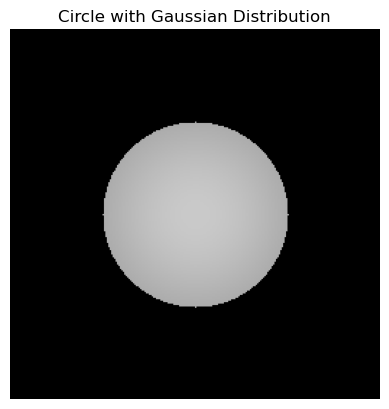

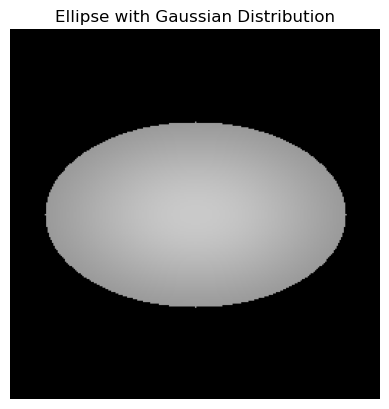

In [244]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

def circle_gen(h, w, target, scale, background_std, background_mean):
    """
    生成一个高斯分布的圆形，并将其绘制到目标图像上。
    
    参数:
    - h: 图像的高度
    - w: 图像的宽度
    - target: 目标图像
    - scale: 缩放因子，用于调整圆形的亮度
    - background_std: 背景标准差，用于生成圆形颜色
    - background_mean: 背景平均值，用于生成圆形颜色
    """
    center = (w // 2, h // 2)
    radius = max(min(h, w) // 4, 1)
    
    for i in range(h):
        for j in range(w):
            if (i - center[0]) ** 2 + (j - center[1]) ** 2 <= radius ** 2:
                _temp = np.exp(-((i - center[0]) ** 2 + (j - center[1]) ** 2) / (2 * (radius ** 2))) * scale
                target[i, j] = np.clip(_temp * background_std + background_mean, 0, 255)
                
    return 

def ellipse_gen(h, w, target, scale, background_std, background_mean, axis=None):
    """
    生成一个高斯分布的椭圆形，并将其绘制到目标图像上。
    
    参数:
    - h: 图像的高度
    - w: 图像的宽度
    - target: 目标图像
    - scale: 缩放因子，用于调整椭圆形的亮度
    - background_std: 背景标准差，用于生成椭圆形颜色
    - background_mean: 背景平均值，用于生成椭圆形颜色
    - axis: 椭圆形的长短轴（可选）
    """
    center = (w // 2, h // 2)
    
    if axis is None:
        axis1 = max(random.randint(h // 4, h // 2), 1)
        axis2 = max(random.randint(w // 4, w // 2), 1)
    else:
        axis1, axis2 = axis
        
    for i in range(h):
        for j in range(w):
            if ((i - center[0]) ** 2 / (axis1 ** 2) + (j - center[1]) ** 2 / (axis2 ** 2)) <= 1:
                _temp = np.exp(-(((i - center[0]) ** 2 / (axis1 ** 2)) + ((j - center[1]) ** 2 / (axis2 ** 2)))) * scale
                target[i, j] = np.clip(_temp * background_std + background_mean, 0, 255)
                
    return axis1, axis2

# 示例调用
h, w = 256, 256
target = np.zeros((h, w, 3), dtype=np.uint8)
scale = 1.5  # 缩放因子
background_std = 50
background_mean = 127

# 生成圆形
circle_gen(h, w, target, scale, background_std, background_mean)

# 使用matplotlib显示结果图像
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title("Circle with Gaussian Distribution")
plt.axis('off')  # 隐藏坐标轴
plt.show()

# 生成椭圆形
target = np.zeros((h, w, 3), dtype=np.uint8)
ellipse_gen(h, w, target, scale, background_std, background_mean)

# 使用matplotlib显示结果图像
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.title("Ellipse with Gaussian Distribution")
plt.axis('off')  # 隐藏坐标轴
plt.show()